<a href="https://colab.research.google.com/github/justfifi17/NYC-Real-Estate-Sales-Prediction/blob/main/NYC_Real_Estate_Sales_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Sales Records In NYC.

This project is set to apply machine learning techniques to predict the sales price of New York City real estate during the years 2016 to 2017. For more information:[www.nyc.gov/site](https://www.nyc.gov/site/finance/taxes/glossary-property-sales.page)


**Borough**: The name of the borough in which the property is located.

**Neighborhood**: Department of Finance assessors determine the neighborhood name in the
course of valuing properties. The common name of the neighborhood is generally the same as
the name Finance designates. However, there may be slight differences in neighborhood
boundary lines and some sub-neighborhoods may not be included.
Building Class Category: This is a field that we are including so that users of the Rolling Sales
Files can easily identify similar properties by broad usage (e.g. One Family Homes) without
looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building
Class Category, Block and Lot.

**Tax Class at Present**: Every property in the city is assigned to one of four tax classes (Classes
1, 2, 3, and 4), based on the use of the property.
• Class 1: Includes most residential property of up to three units (such as one-, two-,
and three-family homes and small stores or offices with one or two attached
apartments), vacant land that is zoned for residential use, and most condominiums
that are not more than three stories.
• Class 2: Includes all other property that is primarily residential, such as cooperatives
and condominiums.
• Class 3: Includes property with equipment owned by a gas, telephone or electric
company.
• Class 4: Includes all other properties not included in class 1,2, and 3, such as
offices, factories, warehouses, garage buildings, etc.

**Block**: A Tax Block is a sub-division of the borough on which real properties are located. The
Department of Finance uses a Borough-Block-Lot classification to label all real property in the
City. “Whereas” addresses describe the street location of a property, the block and lot
distinguishes one unit of real property from another, such as the different condominiums in a
single building. Also, block and lots are not subject to name changes based on which side of the
parcel the building puts its entrance on.

**Lot**: A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

**Easement**: An easement is a right, such as a right of way, which allows an entity to make limited
use of another’s real property. For example: MTA railroad tracks that run across a portion of
another property.

**Building Class at Present**: The Building Classification is used to describe a property’s
constructive use. The first position of the Building Class is a letter that is used to describe a
general class of properties (for example “A” signifies one-family homes, “O” signifies office
buildings. “R” signifies condominiums). The second position, a number, adds more specific
information about the property’s use or construction style (using our previous examples “A0” is a
Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial
condominium unit). The term Building Class used by the Department of Finance is
interchangeable with the term Building Code used by the Department of Buildings. See NYC
Building Classifications.

**Address**: The street address of the property as listed on the Sales File. Coop sales include the
apartment number in the address field.

**Zip Code**: The property’s postal code.

**Residential Units**: The number of residential units at the listed property.

**Commercial Units**: The number of commercial units at the listed property.

**Total Units**: The total number of units at the listed property.

**Land Square Feet**: The land area of the property listed in square feet.

**Gross Square Feet**: The total area of all the floors of a building as measured from the exterior
surfaces of the outside walls of the building, including the land area and space within any
building or structure on the property.

**Year Built**: Year the structure on the property was built.
Building Class at Time of Sale: The Building Classification is used to describe a property’s
constructive use. The first position of the Building Class is a letter that is used to describe a
general class of properties (for example “A” signifies one-family homes, “O” signifies office
buildings. “R” signifies condominiums). The second position, a number, adds more specific
information about the property’s use or construction style (using our previous examples “A0” is a
Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial
condominium unit). The term Building Class as used by the Department of Finance is
interchangeable with the term Building Code as used by the Department of Buildings.

**Sale Date**: Date the property sold.

**Sales Price**: Price paid for the property.

$0 Sales Price: A $0 sale indicates that there was a transfer of ownership without a cash
consideration. There can be a number of reasons for a $0 sale including transfers of ownership
from parents to children

In [ ]:
# Import all the libraries that will be used all together.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import time

In [ ]:
# load dataset
data = pd.read_csv('sales.csv')
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
data.shape

(84548, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Dropping unnecessary columns
Here there are columns that are logically redundant features. So  one of them will be kept while the other one is going to be dropped.
  - BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE columns
  - TAX CLASS AT PRESENT and TAX CLASS AT TIME OF SALE columns

The columns Unnamed and EASE-MENT don't bring any difference to the dataset prediction so they will be dropped.

The APARTMENT NUMBER column is just subjective to the particular house and has no significance to the dataset, hence it will be dropped.

In [ ]:
# drop unnecessary and duplicate columns
data.drop(columns=['Unnamed: 0', 'EASE-MENT', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' ], inplace=True)


## Handle Missing Values and Duplicates

Replace '-' with null value.

Drop duplicates

In [ ]:
#Handle the '-' character and empty spaces which are prevalent in the dataset
#Count the number of the empty spaces and '-' caracter
counts_ = data.applymap(lambda x: str(x).count("-"))
counts_space = data.applymap(lambda x: str(x).count(" "))

print(f"Empty space count = {counts_space.sum().sum()}")
print(f"Character '-' count = {counts_.sum().sum()}")

<ipython-input-5-bce4d836e5dd>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts_ = data.applymap(lambda x: str(x).count("-"))
<ipython-input-5-bce4d836e5dd>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts_space = data.applymap(lambda x: str(x).count(" "))


Empty space count = 2339794
Character '-' count = 320325


In [ ]:
# Replace the '-' character and empty space with nan

map_dict={'-':np.nan,' ':np.nan}
data.replace(map_dict,inplace = True)

In [ ]:
#Check for duplicates
sum(data.duplicated())

765

In [ ]:
#  Drop duplicates
data.drop_duplicates(inplace=True)
sum(data.duplicated())

0

## Sale Date Column Modification
The sale date column has too many details with time of sale specifics, so new features that seemed more important like the year and the month have been extracted from it.

In [ ]:
# Convert SALE DATE to date only
data['SALE DATE'] = pd.to_datetime(data['SALE DATE']).dt.date


In [ ]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,26,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,39,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


In [ ]:
# Convert LAND SQUARE FEET, GROSS SQUARE FEET, and SALE PRICE to numeric after cleaning
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'].str.replace(',', ''), errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'].str.replace(',', ''), errors='coerce')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'].str.replace(',', ''), errors='coerce')


In [ ]:
# see if columns have null values
data.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
BLOCK,0
LOT,0
ADDRESS,0
ZIP CODE,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0


In [ ]:
# we got null values in LAND SQUARE FEET, GROSS SQUARE FEET and SALE PRICE columns
# fill missing values with median of each column

data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].median(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].median(), inplace=True)

In [ ]:
# Drop rows with null sale price values
data.dropna(subset=['SALE PRICE'], inplace=True)

In [ ]:
# check if we still got null values
data.isnull().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
BLOCK,0
LOT,0
ADDRESS,0
ZIP CODE,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0


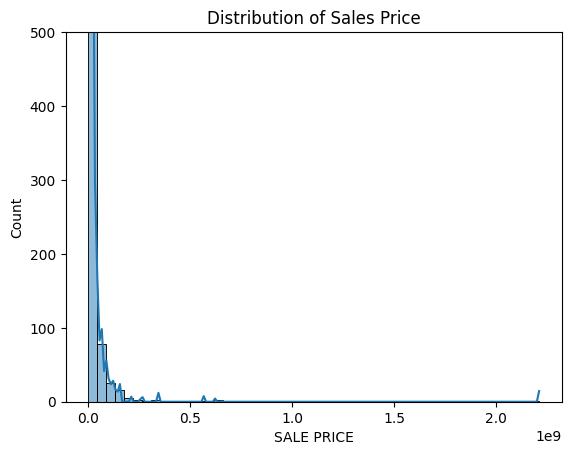

In [ ]:
# Plot the distribution of Sales Price to see the skewness/variance

sns.histplot(data['SALE PRICE'], kde=True, bins=50)
plt.ylim(0, 500)
plt.title('Distribution of Sales Price')
plt.show()


In [ ]:
skewness = data['SALE PRICE'].skew()
print(f'Skewness of Sales Price: {skewness}')


Skewness of Sales Price: 123.94313183709575


A skewness of 135.87 is extremely high, showing that the SALE PRICE distribution is heavily right-skewed. So instead of removing the outliers and losing important data (because it is target variable)
- we will first remove the $0 (transfer of ownership: because it doesn't add meaning to the market analysis we are doing)
- and then use log Transformation technique which will stabilize the variance, reduce skewness, and make a dataset more normal.

In [ ]:
# Remove rows with $0 sales price
## WE REMOVE VALUES TILL $100,000. THE PREDICTION IS NOT DOING GOOD BECAUSE OF THESE TOO LOW AND UREALISTIC VALUES
data = data[data['SALE PRICE'] > 100000]

In [ ]:
skewness = data['SALE PRICE'].skew()
print(f'Skewness of Sales Price: {skewness}')


Skewness of Sales Price: 112.5047133767152


*still very high so we will apply the log transformation*

In [ ]:
data.loc[:, 'SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data.loc[:, 'LOG_SALE_PRICE'] = np.log(data['SALE PRICE'])

In [ ]:
print(data[['SALE PRICE', 'LOG_SALE_PRICE']].head())
#we can see the difference it has made below

   SALE PRICE  LOG_SALE_PRICE
0   6625000.0       15.706361
3   3936272.0       15.185745
4   8000000.0       15.894952
6   3192840.0       14.976421
9  16232000.0       16.602495


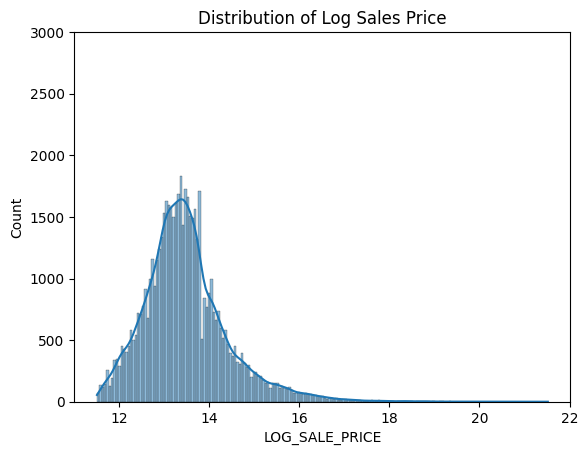

In [ ]:
# Plot the distribution of Sales Price to see the skewness/variance
sns.histplot(data['LOG_SALE_PRICE'], kde=True)
plt.ylim(0, 3000)
plt.title('Distribution of Log Sales Price')
plt.show()

In [ ]:
# Check the data types again to confirm the conversion
data.dtypes


,0
BOROUGH,int64
NEIGHBORHOOD,object
BUILDING CLASS CATEGORY,object
BLOCK,int64
LOT,int64
ADDRESS,object
ZIP CODE,int64
RESIDENTIAL UNITS,int64
COMMERCIAL UNITS,int64
TOTAL UNITS,int64


In [ ]:
summary = data.describe()
summary

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOG_SALE_PRICE
count,56945.000000,56945.000000,56945.000000,56945.000000,56945.000000,56945.000000,56945.000000,5.694500e+04,5.694500e+04,56945.000000,56945.000000,5.694500e+04,56945.000000
mean,2.934885,4134.254070,391.645149,10717.297901,1.702081,0.156414,1.865537,3.166522e+03,2.721816e+03,1816.452770,1.616595,1.564114e+06,13.493028
std,1.332403,3561.422212,669.641131,1206.176947,14.106824,9.892411,17.334387,3.515547e+04,2.358657e+04,495.136547,0.676754,1.261996e+07,0.938122
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.003350e+05,11.516270
25%,2.000000,1270.000000,21.000000,10128.000000,0.000000,0.000000,0.000000,2.000000e+03,1.317000e+03,1920.000000,1.000000,4.050000e+05,12.911642
50%,3.000000,3135.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,2.000000,6.500000e+05,13.384728
75%,4.000000,6099.000000,1002.000000,11357.000000,2.000000,0.000000,2.000000,2.500000e+03,1.836000e+03,1966.000000,2.000000,1.113000e+06,13.922570
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,21.516258


In [ ]:
# Min, max, mean of numerical features
min_values = summary.loc['min']
max_values = summary.loc['max']
mean_values = summary.loc['mean']

print("Minimum values:\n", min_values)
print("Maximum values:\n", max_values)
print("Mean values:\n", mean_values)


Minimum values:
 BOROUGH                           1.00000
BLOCK                             1.00000
LOT                               1.00000
ZIP CODE                          0.00000
RESIDENTIAL UNITS                 0.00000
COMMERCIAL UNITS                  0.00000
TOTAL UNITS                       0.00000
LAND SQUARE FEET                  0.00000
GROSS SQUARE FEET                 0.00000
YEAR BUILT                        0.00000
TAX CLASS AT TIME OF SALE         1.00000
SALE PRICE                   100335.00000
LOG_SALE_PRICE                   11.51627
Name: min, dtype: float64
Maximum values:
 BOROUGH                      5.000000e+00
BLOCK                        1.631900e+04
LOT                          9.106000e+03
ZIP CODE                     1.169400e+04
RESIDENTIAL UNITS            1.844000e+03
COMMERCIAL UNITS             2.261000e+03
TOTAL UNITS                  2.261000e+03
LAND SQUARE FEET             4.252327e+06
GROSS SQUARE FEET            3.750565e+06
YEAR BUILT      

In [ ]:
# check IQR range

Q1 = data['SALE PRICE'].quantile(0.25)
Q3 = data['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['SALE PRICE'] < (Q1 - 1.5 * IQR)) | (data['SALE PRICE'] > (Q3 + 1.5 * IQR))]
print(outliers)


       BOROUGH       NEIGHBORHOOD  \
0            1      ALPHABET CITY   
3            1      ALPHABET CITY   
4            1      ALPHABET CITY   
6            1      ALPHABET CITY   
9            1      ALPHABET CITY   
...        ...                ...   
83878        5  WEST NEW BRIGHTON   
83879        5  WEST NEW BRIGHTON   
83911        5  WEST NEW BRIGHTON   
84392        5        WILLOWBROOK   
84546        5            WOODROW   

                           BUILDING CLASS CATEGORY  BLOCK  LOT  \
0      07 RENTALS - WALKUP APARTMENTS                 392    6   
3      07 RENTALS - WALKUP APARTMENTS                 402   21   
4      07 RENTALS - WALKUP APARTMENTS                 404   55   
6      07 RENTALS - WALKUP APARTMENTS                 406   32   
9      08 RENTALS - ELEVATOR APARTMENTS               387  153   
...                                            ...    ...  ...   
83878  27 FACTORIES                                   186  160   
83879  27 FACTORIES        

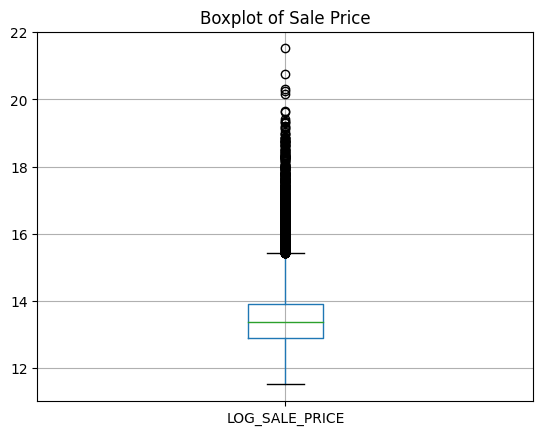

In [ ]:
#check for outliers
data.boxplot(column='LOG_SALE_PRICE')
plt.title('Boxplot of Sale Price')
plt.show()

The data looks to be somewhat symmetrically distributed around the median after the log transformation.
- The boxplot indicates that the log-transformation of SALE PRICE has reduced the skewness of the data, bringing it closer to a more symmetric distribution. This is a positive step for preparing the data for prediction models, especially linear models like linear regression, which assume that the target variable is normally distributed or at least symmetrically distributed.

In [ ]:
# Check for missing values after conversion
missing_values = data.isnull().sum()
missing_values


,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
BLOCK,0
LOT,0
ADDRESS,0
ZIP CODE,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0


In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print(corr_matrix)


                            BOROUGH     BLOCK       LOT  ZIP CODE  \
BOROUGH                    1.000000  0.446368 -0.269702  0.310598   
BLOCK                      0.446368  1.000000 -0.243335  0.279341   
LOT                       -0.269702 -0.243335  1.000000 -0.172092   
ZIP CODE                   0.310598  0.279341 -0.172092  1.000000   
RESIDENTIAL UNITS         -0.015029 -0.006680 -0.029929  0.005900   
COMMERCIAL UNITS           0.001049  0.002651 -0.008150  0.002463   
TOTAL UNITS               -0.011814 -0.004156 -0.028429  0.006201   
LAND SQUARE FEET           0.026208  0.006340 -0.020819 -0.027605   
GROSS SQUARE FEET         -0.022614 -0.018729 -0.033124 -0.005594   
YEAR BUILT                 0.122208  0.093993 -0.313559  0.320100   
TAX CLASS AT TIME OF SALE -0.377037 -0.339796  0.260484 -0.152633   
SALE PRICE                -0.077701 -0.063075  0.010207 -0.037161   
LOG_SALE_PRICE            -0.392458 -0.352263  0.171366 -0.166040   

                           RESIDE

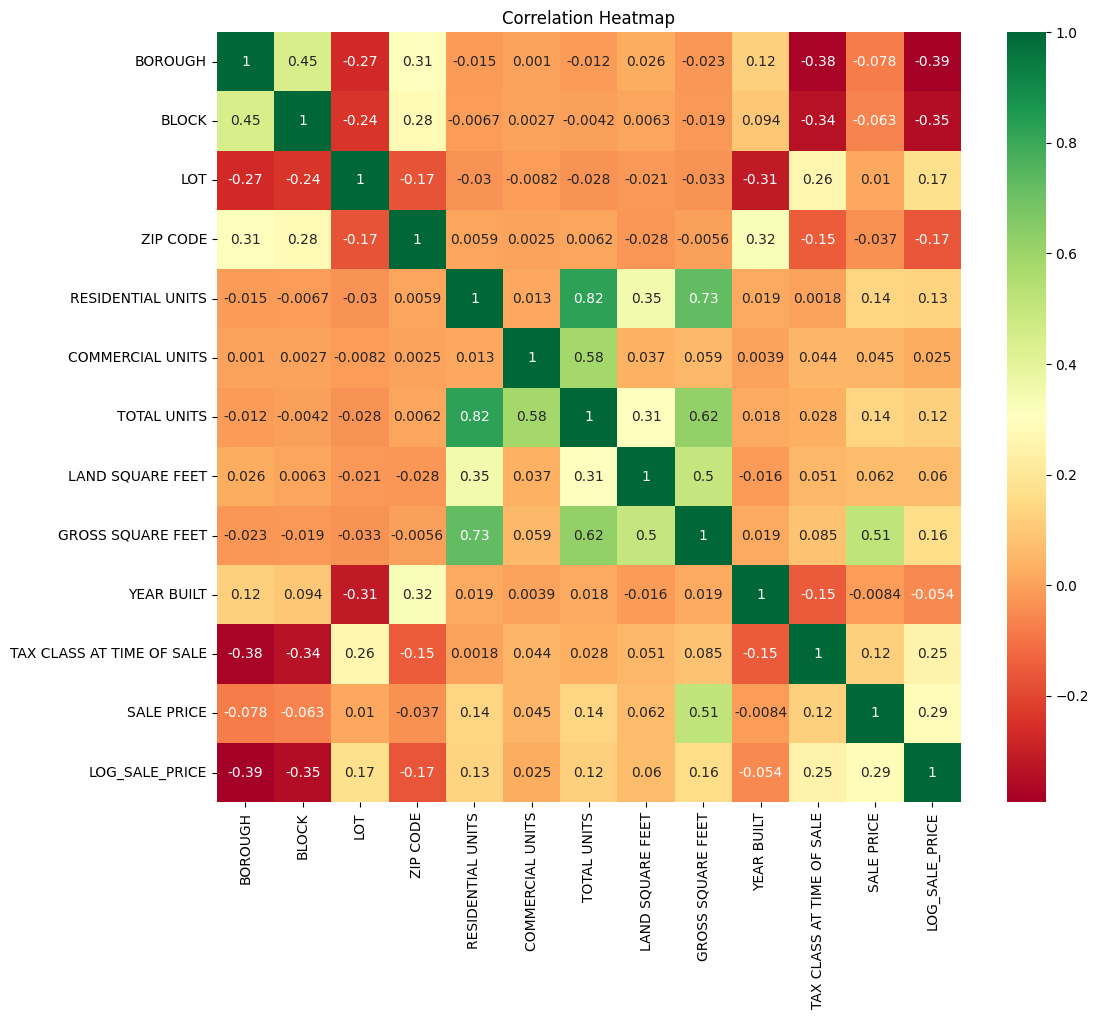

In [ ]:
# plot the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

## Transform training dataset

Assign X and y variables.

Separate the training and testing datasets to freely perform pipelining to enhance the traning dataset.

In [ ]:
# Reassign the sample to X and y
X = data.drop(columns=['SALE PRICE', 'LOG_SALE_PRICE'])

# Drop columns that aren't useful or have too many unique values
y = data['LOG_SALE_PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Drop Highly Correlated Features Based on the Heatmap Analysis
Dropping highly correlated features is helpful to ensure that the model is simpler, more interpretable, and less prone to multicollinearity and overfitting especially during linear regression.


In [ ]:
# Compute the correlation matrix
numeric_cols = X_train.select_dtypes(exclude=['object'])
corr_matrix = numeric_cols.corr().abs()

# Identify the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Identify features to drop based on the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [ ]:
# Dropping 'RESIDENTIAL UNITS' in favor of 'TOTAL UNITS'
if 'RESIDENTIAL UNITS' in X_train.columns:
    to_drop.append('RESIDENTIAL UNITS')

# Dropping either 'GROSS SQUARE FEET' or 'LAND SQUARE FEET' (choose one)
# Here, we choose to drop 'LAND SQUARE FEET'
if 'LAND SQUARE FEET' in X_train.columns:
    to_drop.append('LAND SQUARE FEET')

# Drop 'SALE PRICE' if 'LOG_SALE_PRICE' is being used
if 'SALE PRICE' in X_train.columns and 'LOG_SALE_PRICE' in X_train.columns:
    to_drop.append('SALE PRICE')

# Drop the identified columns from both training and testing sets
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)

# Display the columns that were dropped
print("Dropped columns:", to_drop)

Dropped columns: ['TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET']


In [ ]:
#Apply Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train[['LAND SQUARE FEET', 'GROSS SQUARE FEET']] = scaler.fit_transform(X_train[['LAND SQUARE FEET', 'GROSS SQUARE FEET']])
X_test[['LAND SQUARE FEET', 'GROSS SQUARE FEET']] = scaler.transform(X_test[['LAND SQUARE FEET', 'GROSS SQUARE FEET']])



In [ ]:
# Convert sale date to date time datatype
X_train['SALE DATE'] = pd.to_datetime(X_train['SALE DATE'])
X_test['SALE DATE'] = pd.to_datetime(X_test['SALE DATE'])

In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
date_features = X_train.select_dtypes(include=['datetime']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

date_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
# Check for non-numeric columns
non_numeric_features = X_train.select_dtypes(exclude=['int64', 'float64', 'datetime']).columns
if non_numeric_features.size > 0:
    print(f"Non-numeric columns detected: {non_numeric_features}")
    # Handle non-numeric columns accordingly (e.g., convert or use a different transformer)

Non-numeric columns detected: Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'ADDRESS',
       'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')


In [ ]:
# Proceed with the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('date', date_transformer, date_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Fit the Linear Regression model with the transformed training data
start_time = time.time()

model_lr = LinearRegression()
model_lr.fit(X_train_transformed, y_train)
end_time = time.time()

print(f"Linear Regression model training time: {end_time - start_time:.2f} seconds")

Linear Regression model training time: 18.76 seconds


In [ ]:
# evaluate the model on the test set
y_pred_lr = model_lr.predict(X_test_transformed)

In [ ]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - R^2 Score: {r2_lr}')

Linear Regression - Mean Squared Error: 0.3319396915623235
Linear Regression - R^2 Score: 0.6165420880237378


In [ ]:
# Ridge Regression
model_ridge = Ridge(alpha=0.1)

model_ridge.fit(X_train_transformed, y_train)

y_pred_ridge = model_ridge.predict(X_test_transformed)

In [ ]:
# Lasso Regression
model_lasso = Lasso(alpha=0.1)

model_lasso.fit(X_train_transformed, y_train)

y_pred_lasso = model_lasso.predict(X_test_transformed)

In [ ]:
# RandomForestRegressor 42m
start_time = time.time()
model_rf = RandomForestRegressor()
model_rf.fit(X_train_transformed, y_train)
end_time = time.time()
print(f"Random Forest Regression model training time: {end_time - start_time:.2f} seconds")

Random Forest Regression model training time: 2568.44 seconds


In [ ]:
#evaluate model on test set
y_pred_rf = model_rf.predict(X_test_transformed)

In [ ]:
# Gradient Boosting Regressor #27s

# Train a Gradient Boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
model_gb.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test_transformed)

print("Gradient Boosting model evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting model evaluation:
RMSE: 0.543620775556384
MAE: 0.39446487635645855
R2 Score: 0.6586101469954118


In [ ]:
# Bagging Regressor 42m

# Train a bagging model with decision trees
model_bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# Fit the model on the training data
model_bag.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred_bag = model_bag.predict(X_test_transformed)

print("Bagging model evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_bag)))
print("MAE:", mean_absolute_error(y_test, y_pred_bag))
print("R2 Score:", r2_score(y_test, y_pred_bag))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging model evaluation:
RMSE: 0.45074801046217167
MAE: 0.296961983343848
R2 Score: 0.7652929396972483


In [ ]:
# XGBRegressor #19.8s
start_time = time.time()
model_xgb = XGBRegressor()
model_xgb.fit(X_train_transformed, y_train)
end_time = time.time()
print(f"XGBoost Regression model training time: {end_time - start_time:.2f} seconds")

XGBoost Regression model training time: 19.77 seconds


In [ ]:
# evaluate the model on the test set
y_pred_xgb = model_xgb.predict(X_test_transformed)

In [ ]:
# plot predictions vs actual values
def plot_predictions_vs_actual(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()


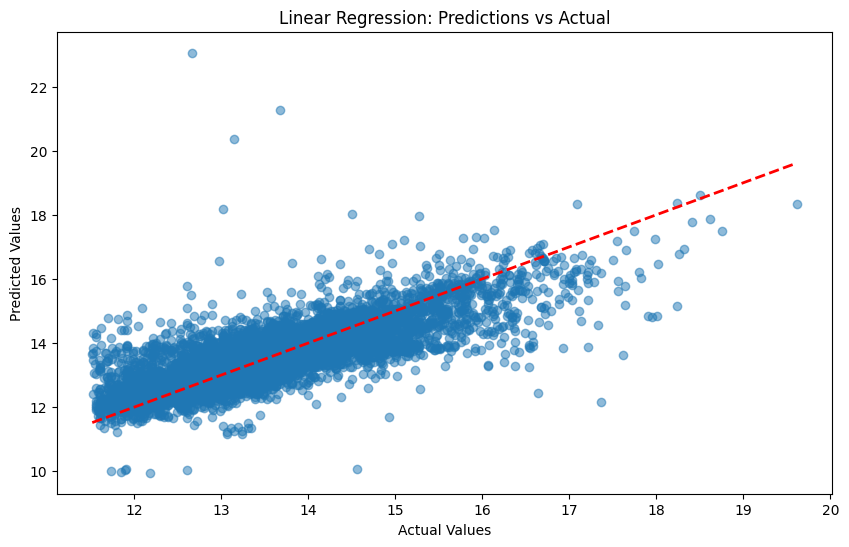

In [ ]:
# Plot predictions vs actual values for linear model
plot_predictions_vs_actual(y_test, y_pred_lr, "Linear Regression: Predictions vs Actual")


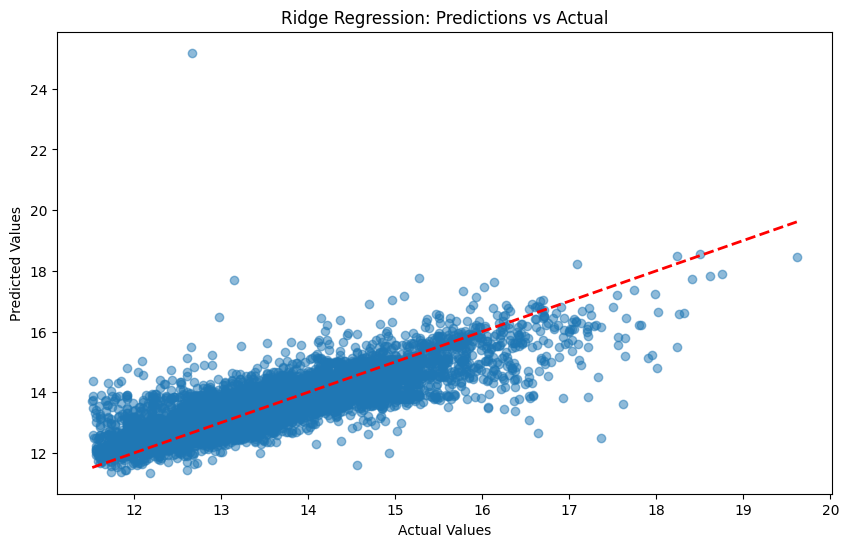

In [ ]:
# Plot predictions vs actual values for Ridge model
plot_predictions_vs_actual(y_test, y_pred_ridge, "Ridge Regression: Predictions vs Actual")

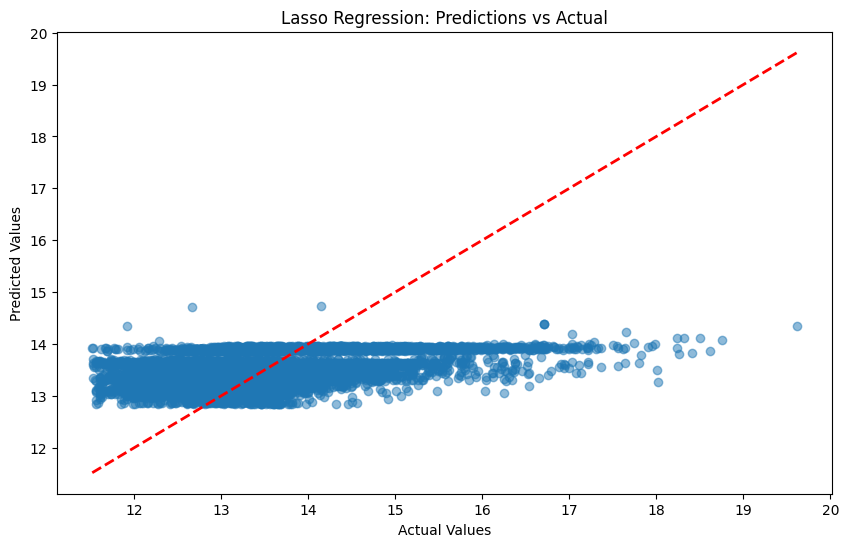

In [ ]:
# Plot predictions vs actual values for Lasso model
plot_predictions_vs_actual(y_test, y_pred_lasso, "Lasso Regression: Predictions vs Actual")

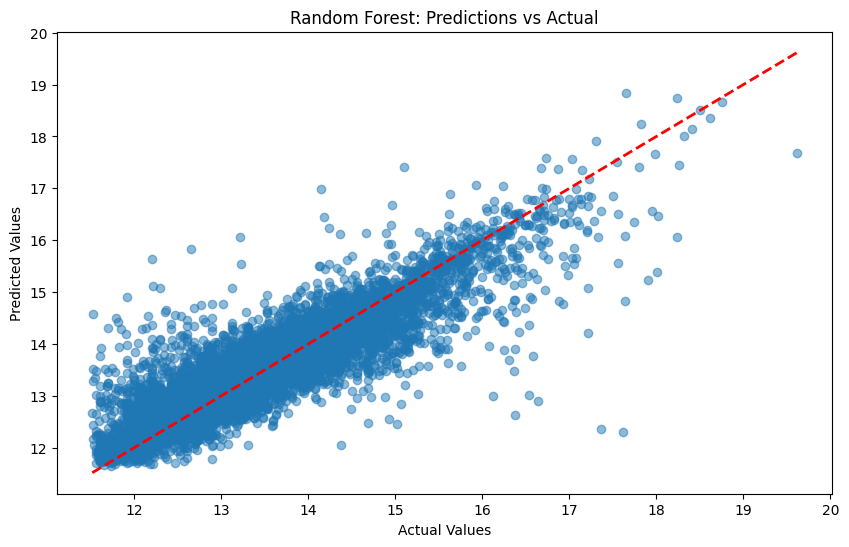

In [ ]:
# Plot predictions vs actual values for RF model
plot_predictions_vs_actual(y_test, y_pred_rf, "Random Forest: Predictions vs Actual")


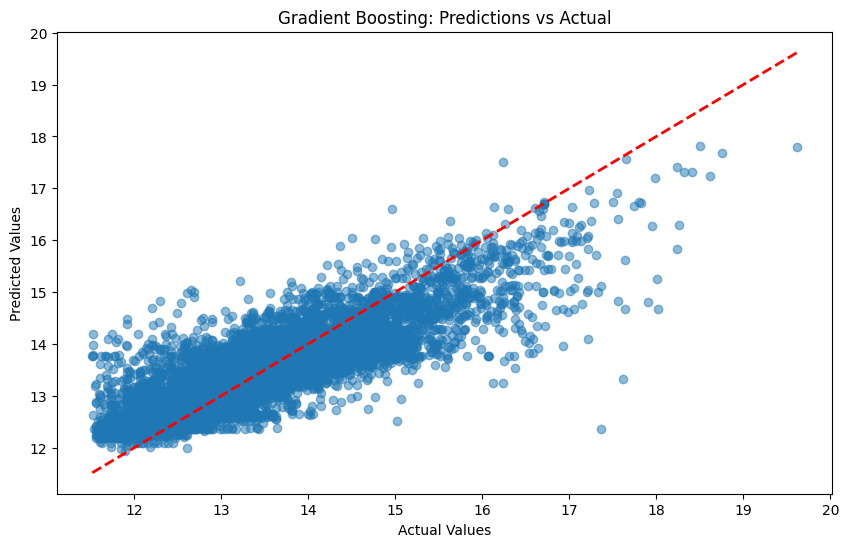

In [ ]:
# Plot predictions vs actual values for Gradient Boosting model
plot_predictions_vs_actual(y_test, y_pred_gb, "Gradient Boosting: Predictions vs Actual")

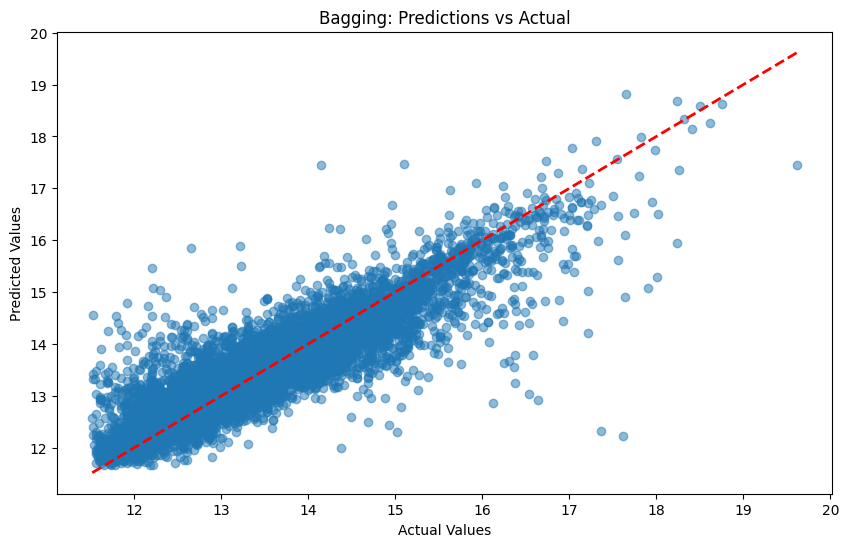

In [ ]:
# Plot predictions vs actual values for Bagging model
plot_predictions_vs_actual(y_test, y_pred_bag, "Bagging: Predictions vs Actual")

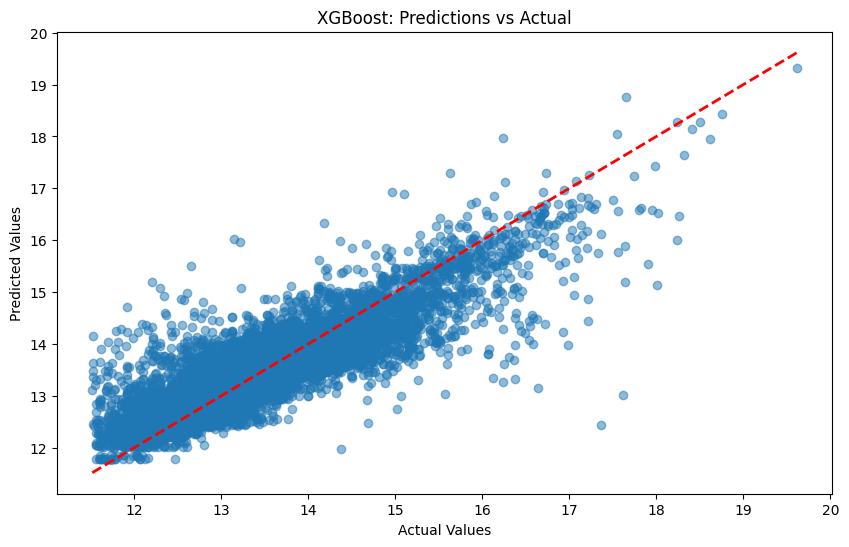

In [ ]:
# Plot predictions vs actual values for XG Boost model
plot_predictions_vs_actual(y_test, y_pred_xgb, "XGBoost: Predictions vs Actual")

In [ ]:
# Comparison
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    rmse = mean_squared_error(y, predictions, squared=False)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    return rmse, mae, r2

# Evaluate models using test data
results = {
    "Linear Regression": evaluate_model(model_lr, X_test_transformed, y_test),
    "Ridge Regression": evaluate_model(model_ridge, X_test_transformed, y_test),
    "Lasso Regression": evaluate_model(model_lasso, X_test_transformed, y_test),
    "Random Forest": evaluate_model(model_rf, X_test_transformed, y_test),
    "Gradient Boosting": evaluate_model(model_gb, X_test_transformed, y_test),
    "Bagging": evaluate_model(model_bag, X_test_transformed, y_test),
    "XGBoost": evaluate_model(model_xgb, X_test_transformed, y_test)
}

# Print results
for model_name, (rmse, mae, r2) in results.items():
    print(f"{model_name} - RMSE: {rmse}, MAE: {mae}, R²: {r2}")

Linear Regression - RMSE: 0.5761420758478967, MAE: 0.3893097490116882, R²: 0.6165420880237378
Ridge Regression - RMSE: 0.5333392850710809, MAE: 0.36079810285479263, R²: 0.6714014324998459
Lasso Regression - RMSE: 0.8413037900626784, MAE: 0.6262386095050991, R²: 0.1823560872928035
Random Forest - RMSE: 0.45070844279413935, MAE: 0.29740868895091876, R²: 0.7653341441095711
Gradient Boosting - RMSE: 0.543620775556384, MAE: 0.39446487635645855, R²: 0.6586101469954118
Bagging - RMSE: 0.45074801046217167, MAE: 0.296961983343848, R²: 0.7652929396972483
XGBoost - RMSE: 0.47903982892194935, MAE: 0.33400327585195777, R²: 0.7349048610695407


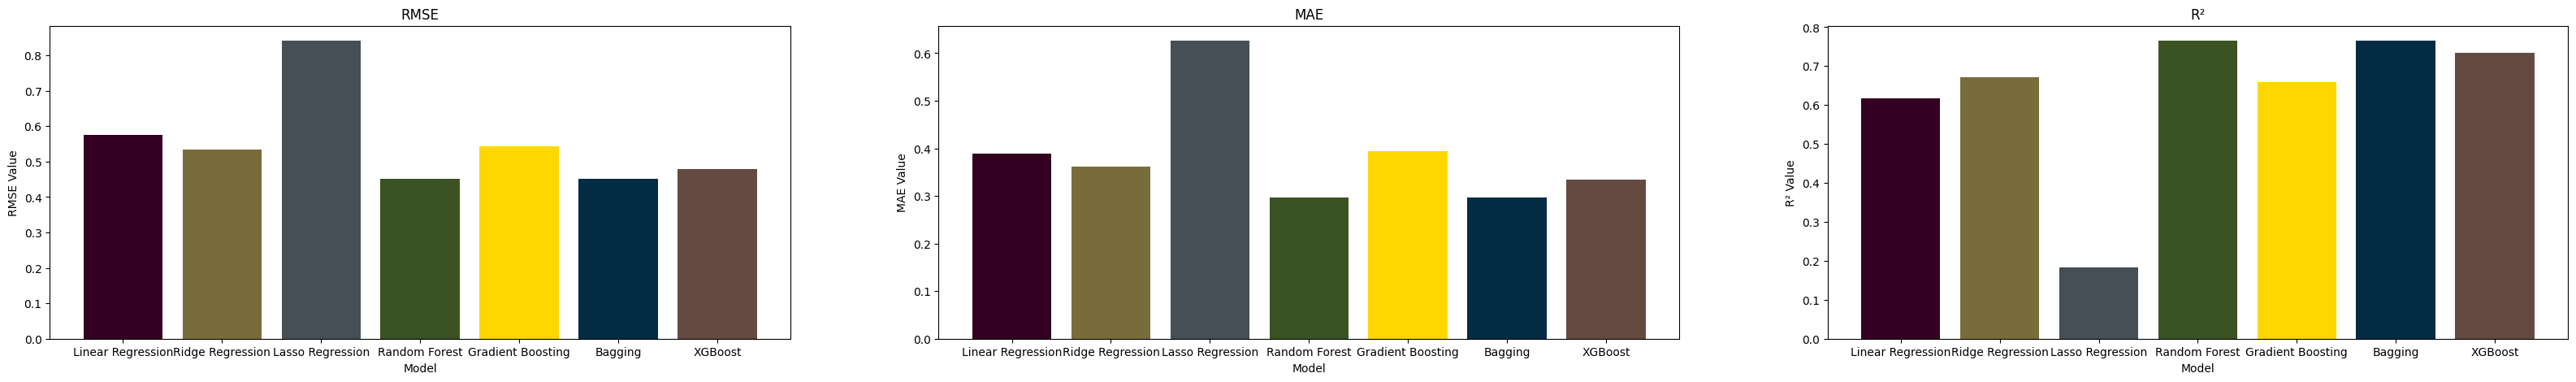

In [ ]:
# Extract the metrics from the results dictionary
models = list(results.keys())
rmse_values = [rmse for rmse, _, _ in results.values()]
mae_values = [mae for _, mae, _ in results.values()]
r2_values = [r2 for _, _, r2 in results.values()]

# Create a figure and axis object
fig, ax = plt.subplots(1, 3, figsize=(40, 5))

# Plot RMSE values with custom color
ax[0].bar(models, rmse_values, color=['#330021', '#786C3B', '#454F55', '#3B5323', '#FFD700','#032B44','#654A41'])
ax[0].set_title('RMSE')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('RMSE Value')

# Plot MAE values with custom color
ax[1].bar(models, mae_values, color=['#330021', '#786C3B', '#454F55', '#3B5323', '#FFD700','#032B44','#654A41'])
ax[1].set_title('MAE')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MAE Value')

# Plot R² values with custom color
ax[2].bar(models, r2_values, color=['#330021', '#786C3B', '#454F55', '#3B5323', '#FFD700','#032B44','#654A41'])
ax[2].set_title('R²')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('R² Value')

# Show the plot
plt.show()


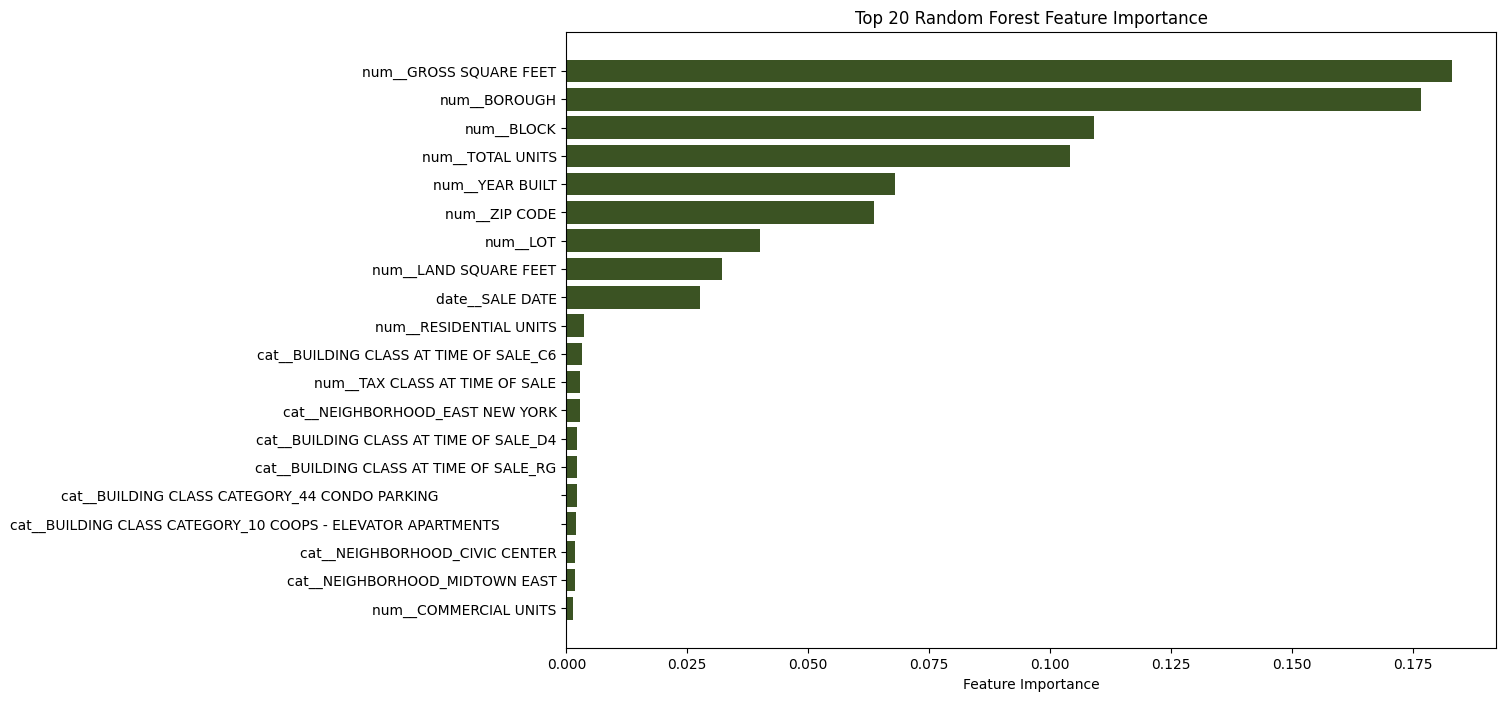

In [ ]:
# Feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Function to plot the top 'n' feature importances for models with feature_importances_ attribute
def plot_feature_importance(model, feature_names, title, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]

    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], align='center', color='#3B5323')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)
    plt.xlabel('Feature Importance')
    plt.show()

# Plot feature importance for RandomForestRegressor
plot_feature_importance(model_rf, feature_names, "Top 20 Random Forest Feature Importance", top_n=20)


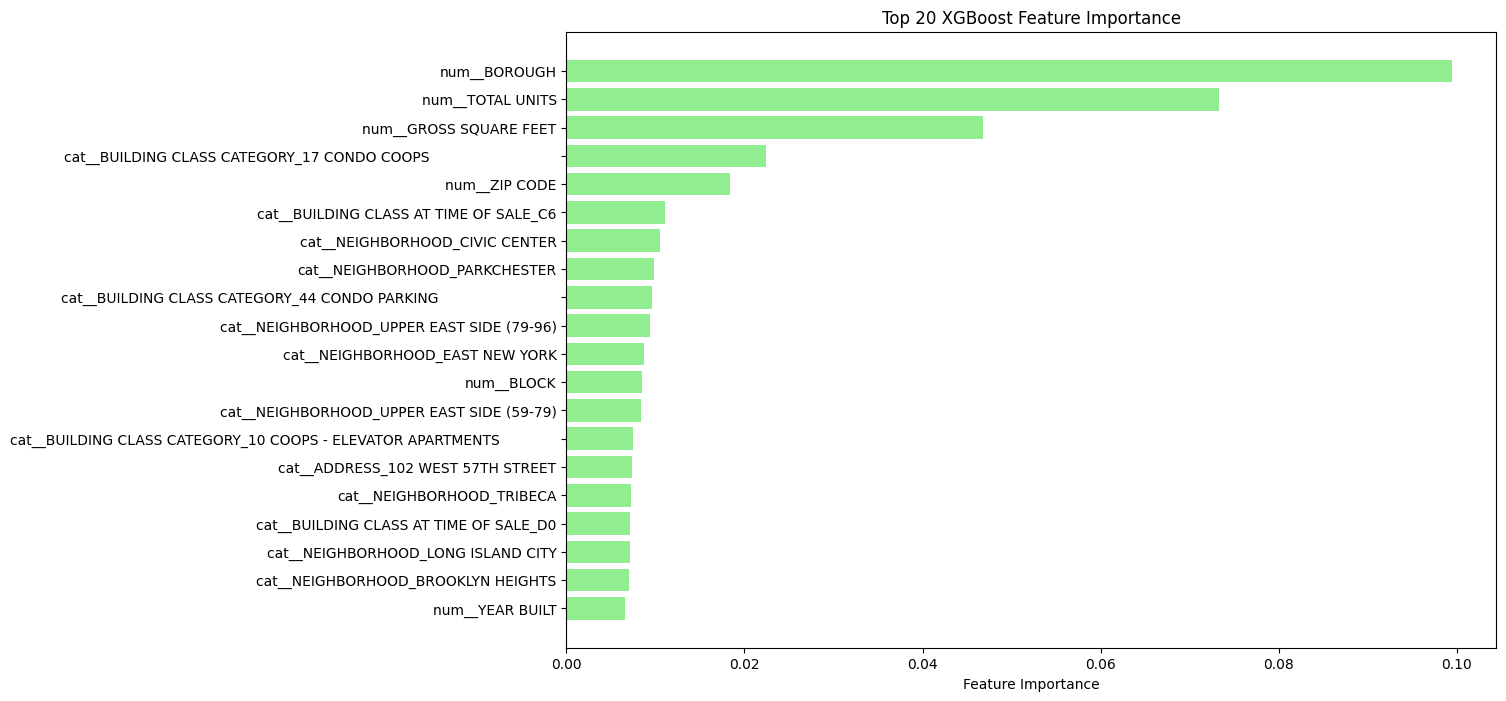

In [ ]:
# Plot feature importance for XGBRegressor
plot_feature_importance(model_xgb, feature_names, "Top 20 XGBoost Feature Importance", top_n=20)

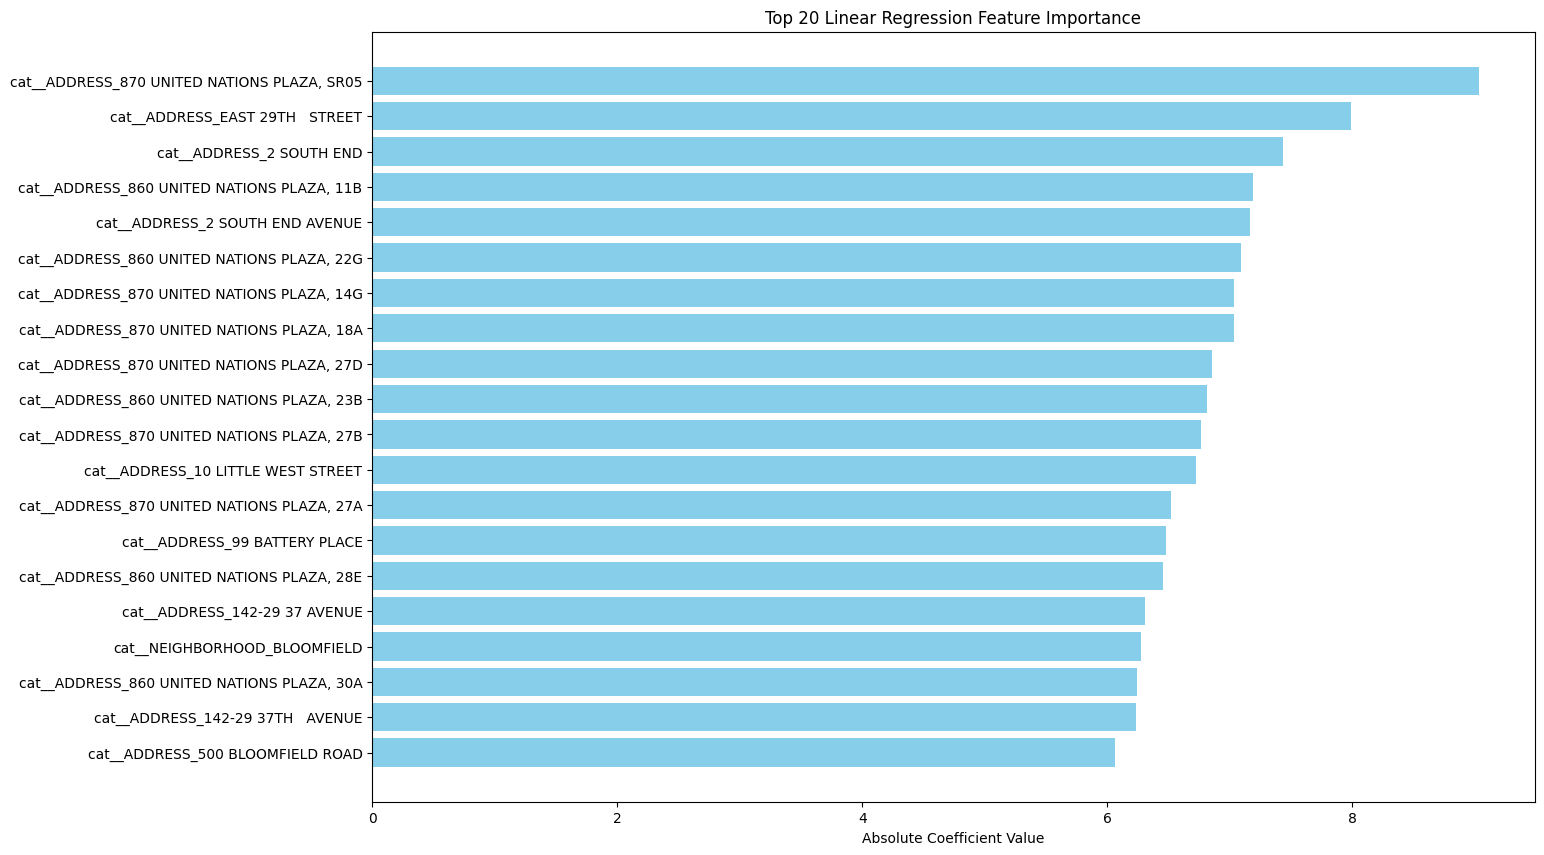

In [ ]:
def plot_linear_regression_feature_importance(model, feature_names, title, top_n=20):
    importances = np.abs(model.coef_)
    indices = np.argsort(importances)[-top_n:]

    plt.figure(figsize=(15, 10))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)
    plt.xlabel('Absolute Coefficient Value')
    plt.show()

# Plot feature importance for LinearRegression
plot_linear_regression_feature_importance(model_lr, feature_names, "Top 20 Linear Regression Feature Importance", top_n=20)

## Chosen Model

The model we chose for this project is **Random Forest** as it has bettere mean score and R square value. The RF model is quite slow as compared to the other models. However, the RF model has better result and the feature importance of the RF model is more realistic.

In [ ]:
print("Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest:
RMSE: 0.45070844279413935
MAE: 0.29740868895091876
R2 Score: 0.7653341441095711
